In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [17]:
mega_covid_cases_path = "covid_mega_df.csv"
vaccination_data = "Vaccination.csv"

In [3]:
mega_covid_df = pd.read_csv(mega_covid_cases_path)
mega_covid_df

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area
0,Afghanistan,229524001.0,8922687.0,33.939110,67.709953,42239854.0,65.0,652860.0
1,Albania,332165775.0,4067833.0,41.153332,20.168331,2832439.0,103.0,27400.0
2,Algeria,302386488.0,7927598.0,28.033886,1.659626,45606480.0,19.0,2381740.0
3,American Samoa,6308947.0,25829.0,-14.270972,-170.132217,43914.0,220.0,200.0
4,Andorra,45675891.0,196698.0,42.546245,1.601554,80088.0,170.0,470.0
...,...,...,...,...,...,...,...,...
261,Saint Martin,NaN,NaN,NaN,NaN,32077.0,605.0,53.0
262,Caribbean Netherlands,NaN,NaN,NaN,NaN,27148.0,83.0,328.0
263,Wallis & Futuna,NaN,NaN,NaN,NaN,11502.0,82.0,140.0
264,Saint Pierre & Miquelon,NaN,NaN,NaN,NaN,5840.0,25.0,230.0


In [4]:
mega_covid_df = mega_covid_df.dropna()
mega_covid_df

,Country,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area
0,Afghanistan,2.295240e+08,8922687.0,33.939110,67.709953,42239854.0,65.0,652860.0
1,Albania,3.321658e+08,4067833.0,41.153332,20.168331,2832439.0,103.0,27400.0
2,Algeria,3.023865e+08,7927598.0,28.033886,1.659626,45606480.0,19.0,2381740.0
3,American Samoa,6.308947e+06,25829.0,-14.270972,-170.132217,43914.0,220.0,200.0
4,Andorra,4.567589e+07,196698.0,42.546245,1.601554,80088.0,170.0,470.0
...,...,...,...,...,...,...,...,...
237,Venezuela,5.838921e+08,6302055.0,6.423750,-66.589730,28838499.0,33.0,882050.0
238,Vietnam,9.435139e+09,40259697.0,14.058324,108.277199,98858950.0,319.0,310070.0
242,Yemen,1.313713e+07,2465452.0,15.552727,48.516388,34449825.0,65.0,527970.0
243,Zambia,3.491532e+08,4421391.0,-13.133897,27.849332,20569737.0,28.0,743390.0


In [5]:
vaccine_df = pd.read_csv(vaccination_data,encoding = "utf8")
vaccine_df

,Country,Vaccinations
0,Argentina,3875508
1,Austria,1956155
2,Bahrain,3246583
3,Belgium,3317302
4,Bermuda,4597
...,...,...
59,Turkey,19731396
60,United Arab Emirates,48174894
61,United Kingdom,112912117
62,United States,358463653


In [6]:
vaccine_df = pd.merge(vaccine_df,mega_covid_df, how="left", on =["Country", "Country"])
vaccine_df

,Country,Vaccinations,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area
0,Argentina,3875508,1.011341e+10,1.522625e+08,-38.416097,-63.616672,45773884.0,17.0,2736690.0
1,Austria,1956155,4.882745e+09,2.359957e+07,47.516231,14.550072,8958960.0,109.0,82409.0
2,Bahrain,3246583,6.633901e+08,1.742051e+06,26.066700,50.557700,1485509.0,1955.0,760.0
3,Belgium,3317302,4.410937e+09,4.088719e+07,50.503887,4.469936,11686140.0,386.0,30280.0
4,Bermuda,4597,1.625893e+07,1.518410e+05,32.321384,-64.757370,64069.0,1281.0,50.0
...,...,...,...,...,...,...,...,...,...
59,Turkey,19731396,1.640482e+10,1.074373e+08,38.963745,35.243322,85816199.0,112.0,769630.0
60,United Arab Emirates,48174894,1.122626e+09,2.760461e+06,23.424076,53.847818,9516871.0,114.0,83600.0
61,United Kingdom,112912117,2.302174e+10,2.613554e+08,55.378051,-3.435973,67736802.0,280.0,241930.0
62,United States,358463653,9.867391e+10,1.218863e+09,37.090240,-95.712891,339996563.0,37.0,9147420.0


In [7]:
# calculate reggression cases and deaths 

slope_death,intersept_death,r_value,p_value,std = linregress(mega_covid_df.total_cases, mega_covid_df.total_deaths)
regression_value = mega_covid_df.total_cases * slope_death + intersept_death
regression_value

0      5.374663e+06
1      6.448481e+06
2      6.136936e+06
3      3.039432e+06
4      3.451281e+06
           ...     
237    9.081992e+06
238    1.016820e+08
242    3.110867e+06
243    6.626200e+06
244    5.666858e+06
Name: total_cases, Length: 203, dtype: float64

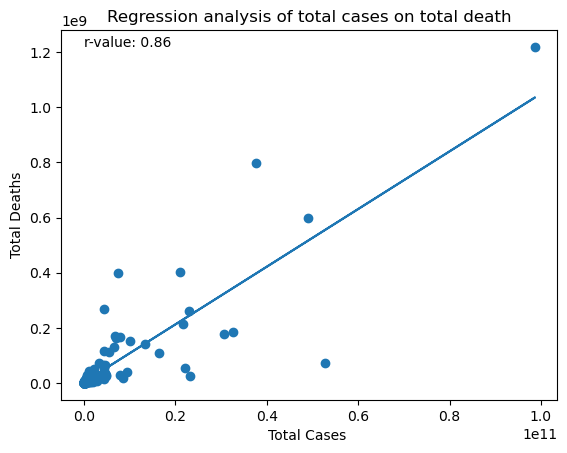

In [9]:
figure, chart = plt.subplots()
chart.scatter(mega_covid_df.total_cases, mega_covid_df.total_deaths)
chart.plot(mega_covid_df.total_cases,regression_value)
chart.set_xlabel ("Total Cases ")
chart.set_ylabel ("Total Deaths")
chart.set_title ("Regression analysis of total cases on total death")
chart.annotate(f'r-value: {round(r_value,2)}', xy = (0,mega_covid_df.total_deaths.max()))
plt.show()


In [11]:
# The scatter plot shows data points scattered primarily in the lower left region, 
# indicating that as the number of total cases increases, total deaths also increase.
# The annotation indicates an r-value (correlation coefficient) of approximately 0.86.
# A high r-value suggests a strong positive correlation between total cases and total deaths. 
# This analysis helps us understand how COVID-19 spreads and why it’s crucial to keep an eye on case numbers.
#The strong correlation underscores the importance of monitoring case numbers for effective public health planning.
#Public health experts use this info to plan and respond effectively.
#By tracking cases, we can predict and prevent more deaths.

In [10]:
vax_new_df = vaccine_df[vaccine_df['Country'] != 'England']
# Rename 'United Kingdom' to 'England'
vax_new_df.loc[vax_new_df['Country'] == 'United Kingdom', 'Country'] = 'England'
vax_new_df

,Country,Vaccinations,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area
0,Argentina,3875508,1.011341e+10,1.522625e+08,-38.416097,-63.616672,45773884.0,17.0,2736690.0
1,Austria,1956155,4.882745e+09,2.359957e+07,47.516231,14.550072,8958960.0,109.0,82409.0
2,Bahrain,3246583,6.633901e+08,1.742051e+06,26.066700,50.557700,1485509.0,1955.0,760.0
3,Belgium,3317302,4.410937e+09,4.088719e+07,50.503887,4.469936,11686140.0,386.0,30280.0
4,Bermuda,4597,1.625893e+07,1.518410e+05,32.321384,-64.757370,64069.0,1281.0,50.0
...,...,...,...,...,...,...,...,...,...
59,Turkey,19731396,1.640482e+10,1.074373e+08,38.963745,35.243322,85816199.0,112.0,769630.0
60,United Arab Emirates,48174894,1.122626e+09,2.760461e+06,23.424076,53.847818,9516871.0,114.0,83600.0
61,England,112912117,2.302174e+10,2.613554e+08,55.378051,-3.435973,67736802.0,280.0,241930.0
62,United States,358463653,9.867391e+10,1.218863e+09,37.090240,-95.712891,339996563.0,37.0,9147420.0


In [11]:
vax_new_df = vax_new_df.nlargest(40,'Vaccinations')
vax_new_df


,Country,Vaccinations,total_cases,total_deaths,latitude,longitude,Population,Density(P/KMsq),Land_Area
62,United States,358463653,9.867391e+10,1.218863e+09,37.090240,-95.712891,3.399966e+08,37.0,9147420.0
61,England,112912117,2.302174e+10,2.613554e+08,55.378051,-3.435973,6.773680e+07,280.0,241930.0
29,Israel,83928749,4.351337e+09,1.315176e+07,31.046051,34.851612,9.174520e+06,424.0,21640.0
9,China,62767000,5.283417e+10,7.072041e+07,35.861660,104.195397,1.425671e+09,152.0,9388211.0
60,United Arab Emirates,48174894,1.122626e+09,2.760461e+06,23.424076,53.847818,9.516871e+06,114.0,83600.0
20,Germany,33013230,3.069298e+10,1.781433e+08,51.165691,10.451526,8.329463e+07,239.0,348560.0
30,Italy,29703535,2.164487e+10,2.129753e+08,41.871940,12.567380,5.887076e+07,200.0,294140.0
25,India,24564363,4.892665e+10,5.993027e+08,20.593684,78.962880,1.428628e+09,481.0,2973190.0
59,Turkey,19731396,1.640482e+10,1.074373e+08,38.963745,35.243322,8.581620e+07,112.0,769630.0
55,Spain,15542638,1.331362e+10,1.410021e+08,40.463667,-3.749220,4.751963e+07,95.0,498800.0


In [12]:
vax_new_df.dtypes

Country             object
Vaccinations         int64
total_cases        float64
total_deaths       float64
latitude           float64
longitude          float64
Population         float64
Density(P/KMsq)    float64
Land_Area          float64
dtype: object

In [13]:
vax_new_df['Vaccinations'] = vax_new_df['Vaccinations'].astype(float)
vax_new_df.dtypes

Country             object
Vaccinations       float64
total_cases        float64
total_deaths       float64
latitude           float64
longitude          float64
Population         float64
Density(P/KMsq)    float64
Land_Area          float64
dtype: object

In [14]:
vax_new_df_cleaned = vax_new_df.dropna(subset=['total_cases', 'Vaccinations'])

slope_vaccinations, intercept_vaccinations, r_value_vaccinations, p_value_vaccinations, std_err_vaccinations = linregress(vax_new_df_cleaned['total_cases'], vax_new_df_cleaned['Vaccinations'])

regression_value_vaccine = vax_new_df_cleaned['total_cases'] * slope_vaccinations + intercept_vaccinations

print(f"Slope: {slope_vaccinations}")
print(f"Intercept: {intercept_vaccinations}")
print(f"R-value: {r_value_vaccinations}")
print(f"P-value: {p_value_vaccinations}")
print(f"Standard Error: {std_err_vaccinations}")
print(f"First few regression values: {regression_value_vaccine.head()}")

Slope: 0.0024293544605166156
Intercept: -8214765.9815713465
R-value: 0.780156295110093
P-value: 2.0281380779617972e-08
Standard Error: 0.00033408416768395955
First few regression values: 62    2.314991e+08
61    4.771321e+07
29    2.356174e+06
9     1.201381e+08
60   -5.487510e+06
Name: total_cases, dtype: float64


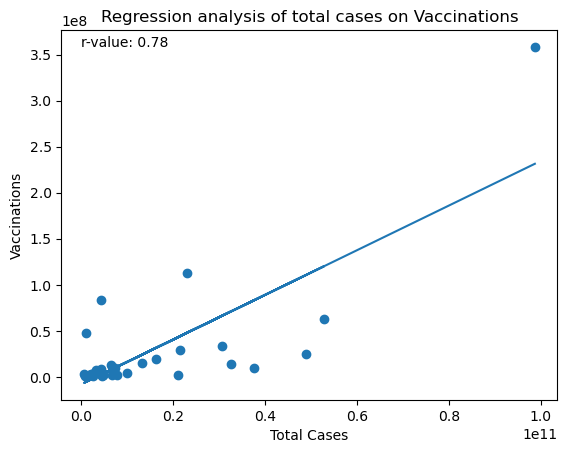

In [15]:
import matplotlib.pyplot as plt


figure2, chart2 = plt.subplots()
chart2.scatter(vax_new_df_cleaned['total_cases'], vax_new_df_cleaned['Vaccinations'], label='Data Points')
chart2.plot(vax_new_df_cleaned['total_cases'], regression_value_vaccine, label='Regression Line')
chart2.set_xlabel("Total Cases")
chart2.set_ylabel("Vaccinations")
chart2.set_title("Regression analysis of total cases on Vaccinations")
chart2.annotate(f'r-value: {round(r_value_vaccinations, 2)}', xy=(0, vax_new_df_cleaned['Vaccinations'].max()))

plt.show()


In [ ]:
#An r-value of 0.78 means there’s a moderate positive relationship between cases and vaccinations.
# So, in our graph, there’s a moderate positive link between cases and vaccinations.